In [11]:
import networkx as nx


In [2]:
import matplotlib.pyplot as plt


In [12]:
import time

In [5]:
G=nx.read_gml('/content/sample_data/dolphins.gml',label='id')
#G=nx.read_gml('/content/sample_data/karate.gml',label='id')
#G = nx.read_pajek('/content/sample_data/jazz.net')

In [6]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61))

In [8]:
print(nx.info(G))
# Average shortest path
print(nx.average_shortest_path_length(G))
# Average clustering coefficient
print(nx.average_clustering(G))

Graph with 62 nodes and 159 edges
3.3569539925965097
0.2589582460550202


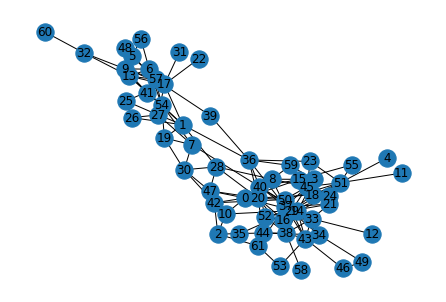

In [9]:
nx.draw(G, with_labels = True)

In [13]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [14]:
# find communities in the graph
start=time.time()
c = girvan_newman(G.copy())
end=time.time()

print("Time taken",end-start)

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

Time taken 0.22460222244262695


In [15]:
node_groups

[[0,
  2,
  3,
  4,
  8,
  10,
  11,
  12,
  14,
  15,
  16,
  18,
  20,
  21,
  23,
  24,
  28,
  29,
  30,
  33,
  34,
  35,
  36,
  37,
  38,
  40,
  42,
  43,
  44,
  45,
  46,
  47,
  49,
  50,
  51,
  52,
  53,
  55,
  58,
  59,
  61],
 [1,
  5,
  6,
  7,
  9,
  13,
  17,
  19,
  22,
  25,
  26,
  27,
  31,
  32,
  39,
  41,
  48,
  54,
  56,
  57,
  60]]

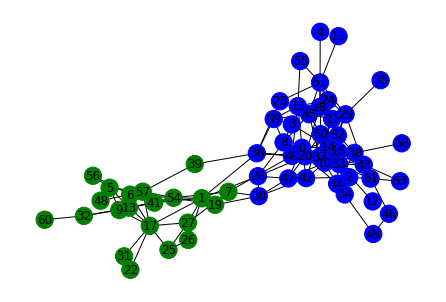

In [16]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()